# 지도학습과 비지도학습

* 지도학습 : 우리가 무언가 예측하고자 하는 변수가 존재 (ex : 판매율, 주가 등등)
    
    * 회귀 : 예측하고자 하는 변수가 연속형 변수(오늘 소개하려는 단순선형회귀분석)
    * 분류 : 예측하고자 하는 변수가 범주형 변수(채무 이행, 불이행 문제)

* 비지도학습 : 예측하고자 하는 타겟변수가 없고 주어진 변수들을 통해 성격이 유사한 녀석들끼리 그룹을 형성하게끔 만든다.

# import

In [1]:
# |  code-fold : true
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "plotly_mimetype+notebook_connected"
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
import statsmodels.api as sm

from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP.models import (ModelSpec as MS,
summarize,poly)

# 상황극 : 아이스크림과 온도

`-`  상황극 $\to$ 날이 더울수록로 아이스 아메리카노의 판매량이 증가함

*  이를 바탕으로 일기예보의 온도자료를 이용하여  다음과 같은 세계의 법칙이 있다고 가정하자.

$$\text{아이스 아메리카노} =  2.2 \times \text{온도} + 10.2 + \varepsilon$$

* 우리가 해야하는 것은 최대한 저 수식에 가까운 $\beta_1 \approx 2.2, \, \beta_0 \approx 10.2$를 찾는 것이다.

* 이를 수식으로 표현하면.

$$\text{아이스 아메리카노} \approx  2.2 \times \text{온도} + 10.2 $$

## 데이터 생성

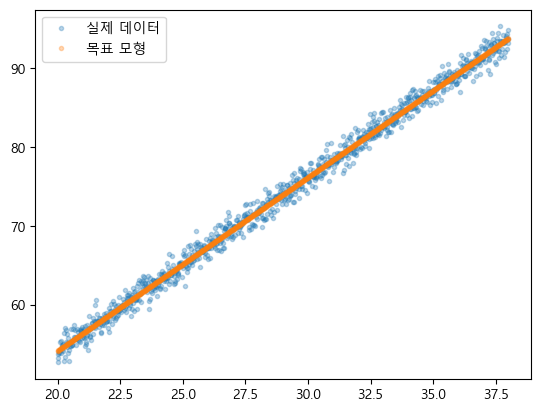

In [2]:
# | code-fold : true
x   = np.linspace(20,38,1000)
epsilon = np.random.normal(size=1000)
y  =  10.2 + 2.2*x + epsilon
yhat = 10.2+2.2*x
plt.plot(x,y,".",label = "실제 데이터",alpha=0.3)
plt.plot(x,yhat,".",label = "목표 모형",alpha=0.3)
plt.legend()

## 최적의 $\beta$를 구하는 방법 1

* 구하고자 하는 법칙

* 베타 추정치

$$\hat {\beta}_1 = \frac {\sum (x-\bar x) (y -\bar y)} {\sum (x-\bar x)^2}= \frac{S_{xy}}{S_{xx}}$$

$$\hat {\beta}_0 = \bar {y} - \hat{\beta}_1\bar{x}$$

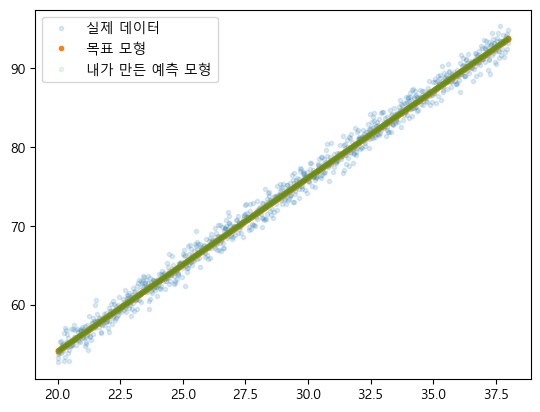

In [3]:
# |code-fold : true
n = len(x)
Sxy = sum((x-np.mean(x))*(y-np.mean(y)) )
Sxx = sum((x-np.mean(x))**2)

beta1 = Sxy/Sxx

beta0 =  np.mean(y) - beta1*np.mean(x)

plt.plot(x,y,".",label = "실제 데이터",alpha=0.15)
plt.plot(x,yhat,".",label = "목표 모형",alpha=1.0)
plt.plot(x,beta1*x+beta0,".",label = "내가 만든 예측 모형",alpha=0.1)
plt.legend()

* 구하고자 하는 법칙

$$\hat{y} \approx  2.2x + 10.2 $$

In [4]:
beta1,beta0

(2.201391988948589, 10.18755888066763)

## 최적의 $\beta$를 구하는 방법 2 ($\star\star\star$)

`-` matrix 이용

$$\hat {\bf {\beta}} = \bf{(X^{\top}X)^{-1}X^{\top}Y}$$

$$\bf \hat Y = X \hat {\boldsymbol{\beta}} = \begin{bmatrix}
1  & x_{11}  & x_{12} &\dots & x_{1p} \\ 1  & x_{21}  & x_{22} &\dots & x_{2p}  \\ \dots & \dots \\  1  & x_{n1}  & x_{n2} &\dots & x_{np}\end{bmatrix}  \,\,\begin{bmatrix} \hat \beta_0  \\ \hat \beta_1  \\ \dots \\ \beta_n \end{bmatrix} $$

`-` X 생성

In [5]:
X = pd.DataFrame({"intercept" :  np.ones(len(x)),
                             "x1" : x})

Y = y.reshape(-1,1)

beta = np.linalg.inv(X.T @ X) @ X.T @Y
beta

,0
0,10.187559
1,2.201392


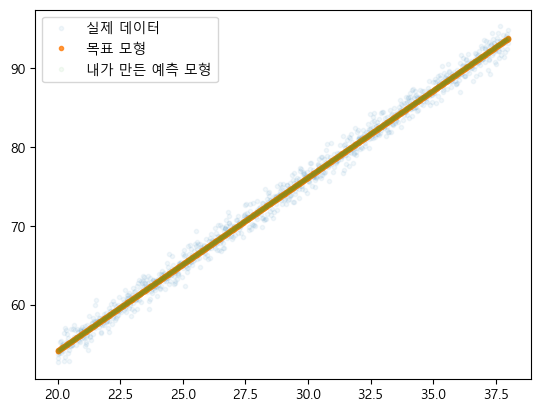

In [6]:
# | code-fold : true
plt.plot(x,y,".",label = "실제 데이터",alpha=0.06)
plt.plot(x,yhat,".",label = "목표 모형",alpha=0.8)
plt.plot(x,np.array(X) @ beta,".",label = "내가 만든 예측 모형",alpha=0.05)
plt.legend()

## 예측 성능 평가

In [7]:
np.mean((y-yhat)**2)

0.9182134409556464

***

# 교재 구현 1

In [8]:
import statsmodels.api as sm

`-` OLS : Ordinary Least Squares의 약자로, 주어진 데이터에서 오차의 제곱을 최소화하는 
를  $\beta_i$추정한다.

In [9]:
X = pd.DataFrame({"intercept" :  np.ones(len(x)),
                             "x1" : x})

model = sm.OLS(y,X)
results = model.fit()

$$\hat{y} \approx  2.2x + 10.2 $$

In [10]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 1.426e+05
Date:                Tue, 05 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:10:54   Log-Likelihood:                -1375.8
No. Observations:                1000   AIC:                             2756.
Df Residuals:                     998   BIC:                             2765.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     10.1876      0.172     59.320      0.000       9.851      10.525
x1             2.2014      0.006    377.663      0.000       2.190       2.213
==============================================================================
Omnibus:                        0.621   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.733   Jarque-Bera (JB):                0.493
Skew:                           0.004   Prob(JB):                        0.782
Kurtosis:                       3.108   Cond. No.                         167.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 결과 시각화

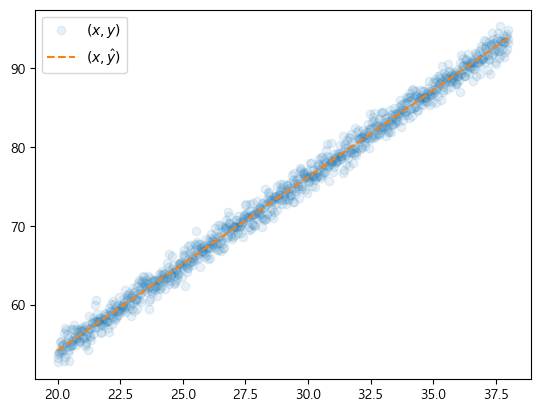

In [11]:
yhat = results.predict()

plt.plot(x,y,"o",label = r"$(x,y)$",alpha=0.1)
plt.plot(x,yhat,"--",label = r"$(x,\hat {y})$")
plt.legend()

# 교재 구현2 (MS)

In [12]:
from ISLP.models import (ModelSpec as MS,
summarize,poly)

In [13]:
X = pd.DataFrame({"intercept" :  np.ones(len(x)),
                             "x1" : x,
                              "x2" : 2*x})

In [14]:
X.head()

,intercept,x1,x2
0,1.0,20.000000,40.000000
1,1.0,20.018018,40.036036
2,1.0,20.036036,40.072072
3,1.0,20.054054,40.108108
4,1.0,20.072072,40.144144


## step 1. 전달할 `x`를 다음과 같이 전달

In [15]:
design = MS(["x1"])

## step 2. 컴퓨터가 이해할 수 있는 형태에 맞게 $\bf{X}$를 생성

In [16]:
_X = design.fit_transform(X)

In [17]:
_X

,intercept,x1
0,1.0,20.000000
1,1.0,20.018018
2,1.0,20.036036
3,1.0,20.054054
4,1.0,20.072072
...,...,...
995,1.0,37.927928
996,1.0,37.945946
997,1.0,37.963964
998,1.0,37.981982


## step3. 모델 적합

In [18]:
model = sm.OLS(y, _X)
results = model.fit()

## step4. 결과 확인

In [19]:
summarize(results)

,coef,std err,t,P>|t|
intercept,10.1876,0.172,59.320,0.0
x1,2.2014,0.006,377.663,0.0


In [20]:
report = results.summary()
report

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 1.426e+05
Date:                Tue, 05 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:10:55   Log-Likelihood:                -1375.8
No. Observations:                1000   AIC:                             2756.
Df Residuals:                     998   BIC:                             2765.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     10.1876      0.172     59.320      0.000       9.851      10.525
x1             2.2014      0.006    377.663      0.000       2.190       2.213
==============================================================================
Omnibus:                        0.621   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.733   Jarque-Bera (JB):                0.493
Skew:                           0.004   Prob(JB):                        0.782
Kurtosis:                       3.108   Cond. No.                         167.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## step5. 결과 시각화

In [21]:
x = _X["x1"]
yhat = results.predict()

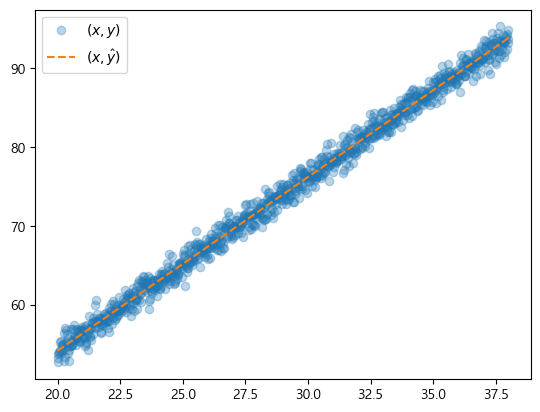

In [22]:
plt.plot(x,y,"o",label = r"$(x,y)$",alpha=0.3)
plt.plot(x,yhat,"--",label = r"$(x,\hat {y})$")
plt.legend()

***

# Extra 1. 결정계수

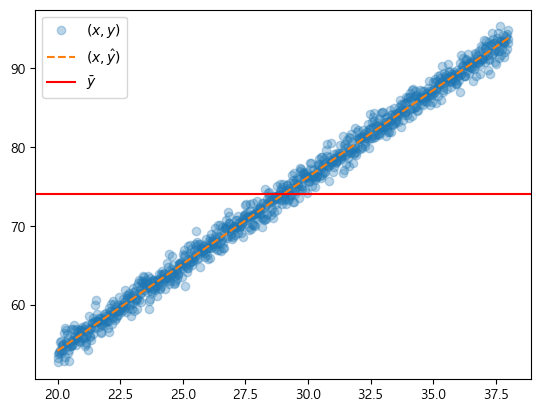

In [58]:
# | code-fold : true
plt.plot(x,y,"o",label = r"$(x,y)$",alpha=0.3)
plt.plot(x,yhat,"--",label = r"$(x,\hat {y})$")
plt.axhline(np.mean(y),color= "r",label = r"$\bar {y}$")
plt.legend()

$$SST = SSE + SSR$$

$$\sum {(y-\bar {y})^2} = \sum {(y-\hat  {y})^2} + \sum {(\hat  {y}- \bar {y})^2}   $$

$$\text{총 편차 제곱합} = \text {잔차 제곱합} + \text {회귀 제곱합}$$

$$R^2 = \frac{SSR}{SST}$$

In [57]:
R2 =sum((yhat-np.mean(y))**2)/sum((y-np.mean(y))**2)
R2

0.9930514460665987

In [39]:
report.tables[0]

Dep. Variable:,y,R-squared:,0.993
Model:,OLS,Adj. R-squared:,0.993
Method:,Least Squares,F-statistic:,1.426e+05
Date:,"Tue, 05 Sep 2023",Prob (F-statistic):,0.00
Time:,17:10:55,Log-Likelihood:,-1375.8
No. Observations:,1000,AIC:,2756.
Df Residuals:,998,BIC:,2765.
Df Model:,1,,
Covariance Type:,nonrobust,,


***

# Extra 2. 평가지표

![](cm.png)

`-` 정확도

In [59]:
(9644+ 81 )/10000

0.9725

`-` 근데....??? 

In [64]:
(252/333)

0.7567567567567568

`-` 정밀도 : 모델의 건방짐 $\to$ 모델이 참이라고 예측한 것 중에 실제 참인 거의 비율 

In [69]:
(81/104)

0.7788461538461539

`-` 재현율  :  모델(감독관) 관점 (실제 참인 것 중에 모델이 참이라고 예측한 것의 비율)

In [70]:
(81/333)

0.24324324324324326

# 참고...

`-` [회귀계수 추정](https://gangcheol.github.io/mysite/posts/Lecture/STBD/2022-03-08-(1%EC%A3%BC%EC%B0%A8).html#extra)